# **Digit Recognition Using Multi-Layer Perceptron**

## Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


## Defining the DigitRecognizer Class

In [ ]:
class DigitRecognizer:
  #Initialization of the Model
  def __init__(self,input_shape=(28,28),num_classes=10):
    self.input_shape=input_shape
    self.num_classes=num_classes
    self.model=self._build_model()

#Building the Neural Network Model
  def _build_model(self):
    model=Sequential([
        Flatten(input_shape=self.input_shape),
        Dense(128,activation="relu"),
        Dense(64,activation="relu"),
        Dense(self.num_classes,activation="softmax")
    ])
    model.compile(optimizer=Adam(),loss="categorical_crossentropy",metrics=["accuracy"])
    return model

#Training the Model
  def train(self,x_train,y_train,x_val,y_val,epochs=10,batch_size=32):
    history=self.model.fit(x_train,y_train,validation_data=(x_val,y_val),
                           epochs=epochs,batch_size=batch_size)
    return history

#Evaluating the Model
  def evaluate(self,x_test,y_test):
    loss,accuracy=self.model.evaluate(x_test,y_test)
    print(f"Test Accuracy: {accuracy*100:.2f}%")
    return accuracy

#Making Predictions on a Single Image
  def predict(self,image):
    image=image.reshape(1,28,28)
    prediction=self.model.predict(image)
    return np.argmax(prediction)

#Plotting Training Progress
  def plot_training_history(self,history):
    plt.plot(history.history['accuracy'],label='Training Accuracy')
    plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training Progress")
    plt.show()


## Loading and Preprocessing the MNIST Dataset

In [ ]:
#load dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0   #Normalize images
y_train,y_test=to_categorical(y_train,10), to_categorical(y_test,10)  #Converting Labels to Categorical Format

#split validation set
x_val,y_val=x_train[-10000:],y_train[-10000:]
x_train,y_train=x_train[:-10000],y_train[:-10000]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Initializing & training the model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8688 - loss: 0.4579 - val_accuracy: 0.9607 - val_loss: 0.1400
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9649 - loss: 0.1184 - val_accuracy: 0.9722 - val_loss: 0.0986
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9748 - loss: 0.0822 - val_accuracy: 0.9739 - val_loss: 0.0855
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9830 - loss: 0.0535 - val_accuracy: 0.9742 - val_loss: 0.0868
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9861 - loss: 0.0432 - val_accuracy: 0.9768 - val_loss: 0.0802
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9733 - val_loss: 0.0950
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9756 - val_loss: 0.0900
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9933 - loss: 0.0210

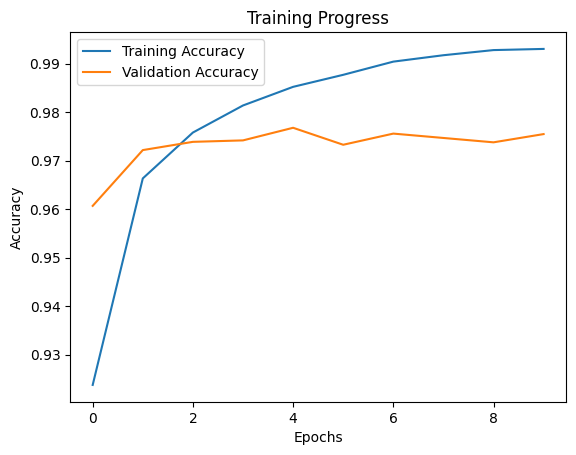

In [ ]:
#initialize and train model
digit_recognizer=DigitRecognizer()
history=digit_recognizer.train(x_train,y_train,x_val,y_val,epochs=10,batch_size=32)
digit_recognizer.plot_training_history(history)

## Evaluating & Testing the model

In [ ]:
#evaluate model
digit_recognizer.evaluate(x_test,y_test)
#test on a single image
sample_image=x_test[0]
predicted_label=digit_recognizer.predict(sample_image)
print(f"Predicted Digit: {predicted_label}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1188
Test Accuracy: 97.44%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted Digit: 7


## Displaying image

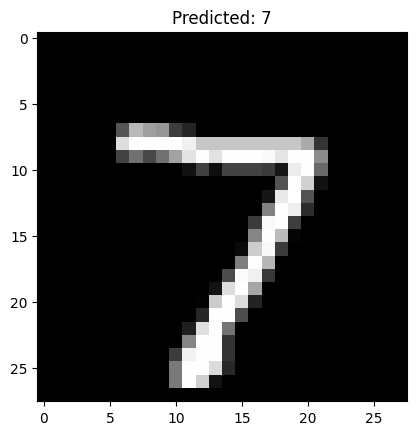

In [ ]:
#Display the image
plt.imshow(sample_image,cmap="gray")
plt.title(f"Predicted: {predicted_label}")
plt.show()

## Conclusion

This program uses TensorFlow/Keras to implement a digit recognizer based on neural networks.  The MNIST dataset, which consists of images of handwritten numbers, is used for training.  The model employs a softmax classifier, ReLU activations, and a multi-layer perceptron (MLP) with dense layers.  Following training, the model can successfully recognize handwritten digits and achieves high accuracy on test data.